# Day 2 exercises - Creating `plot_bsd`

Exercise 1. Using your function from Exercise 2 on Sheet 1, write a function which computes the **poor man's $L$-function**

$$f_E(x) = \prod_{p \leq x}\frac{N_p(E)}{p}$$

for a given elliptic curve $E/\mathbb{Q}$ and input $x \in \mathbb{R}$.

In [2]:
import numpy
def PML_list(E,x):
    L = [1]
    prod = 1
    for p in prime_range(1,x):
        prod  = prod*E.Np(p)/p
        L.append(prod)
    return L
PML_list(E,10)


[1, 3/2, 2, 12/5, 108/35]

In [59]:
%%timeit -r 1 -n 1
PML(E,10000)

10.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Exercise 2. Create a scatter plot of $f_E(x)$ for various elliptic curves $E$. What patterns can you observe? 

In [6]:
import matplotlib.pyplot as plt


In [3]:
E1 = EllipticCurve([1,2,3,4,5])
E2 = EllipticCurve([3,4,5,6,7])
E3 = EllipticCurve([5,6,7,8,9])


Exercise 3. Create a scatter plot of $\log(f_E(x))$ against $\log\log(x)$ for various elliptic curves $E$. Ensure that the plot includes other helpful user information such as the bound on $x$ used, the Elliptic curves plotted, and possibly suggestive lines of nearest fit.

2.83 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


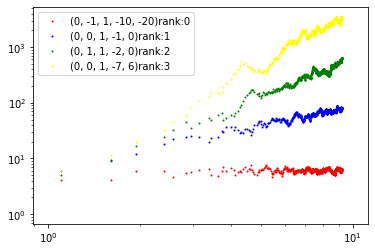

<Figure size 1440x1440 with 0 Axes>

In [8]:
%%timeit -r 1 -n 1
colour = ["red", "blue", "green", "yellow", "purple"]
def plot_bsd_faster(ecs_list,B):
    x = [0]+[log(a) for a in prime_range(B)]
    for E in ecs_list:
        y = PML_list(E,B)
        plt.scatter(x,y,color = colour[ecs_list.index(E)%5],s=1,label = str(E.ainvs())+"rank:"+str(E.rank()))
    plt.legend(loc = 'upper left')
    plt.xscale("log")
    plt.yscale("log")
    plt.figure(figsize=(20,20))
    #plt.savefig('hopethisworks.png', dpi=100)
#trying to use barinders curves
B1 = EllipticCurve('11a1')
B2 = EllipticCurve('37a1')
B3 = EllipticCurve('389a1')
B4 = EllipticCurve('5077a1')
Bar = [B1, B2, B3, B4]
plot_bsd_faster(Bar, 10000)

Exercise 4. Create a `plot_bsd` function which works for a list of elliptic curves over an arbitrary number field.

In [2]:
#Poorman over fields
def PML_list_NF(E,K,x):
    L = [(1,1)]
    prod = 1
    for S in K.primes_of_bounded_norm(x):
           if  E.has_good_reduction(S):
                prod = prod*E.reduction(S).cardinality()/S.norm()
                L.append((S.norm(),prod))
    return L


In [3]:
def plot_bsd_NF(ecs_list,F , B):
            for E in ecs_list:
                        L = PML_list_NF(E,F,B)
                        x = [log(entry[0]) for entry in L]
                        y = [entry[1] for entry in L]
                        plt.scatter(x,y,color = 'green',s=1,label = str(E.ainvs())+"rank:"+str(E.rank()))
            plt.legend(loc = 'upper left')
            plt.xscale("log")
            plt.yscale("log")
            plt.figure(figsize=(20,20))
            plt.show()
            return
K.<a> = NumberField(x^2+1)
E = EllipticCurve(K,[0,5])
plot_bsd_NF([E],K,10000)

NameError: name 'plt' is not defined

Exercise 5. Can you find an elliptic curve $E/\mathbb{Q}$, and four number fields $K_1, K_2, K_3, K_4$ for which the rank of $E(K_i)$ is different for each $i$. Create the BSD plot for these base-changed curves.

In [157]:
E = EllipticCurve([0,6])
polynomials = [x^2-3,x^2-5,x^2-7,25- 18*x^2 + x^4]
K1.<g1> = NumberField(x^2-3)
K2.<g2> = NumberField(x^2-5)
K3.<g3> = NumberField(x^2-7)
K4.<g4> = NumberField(25- 18*x^2 + x^4)
ListofFields=[K1,K2,K3,K4]
print(E)
for F in ListofFields:
    print(F,'rank:',E.base_extend(F).rank())


Elliptic Curve defined by y^2 = x^3 + 6 over Rational Field
Number Field in g1 with defining polynomial x^2 - 3 rank: 0
Number Field in g2 with defining polynomial x^2 - 5 rank: 1
Number Field in g3 with defining polynomial x^2 - 7 rank: 2
Number Field in g4 with defining polynomial x^4 - 18*x^2 + 25 rank: 4


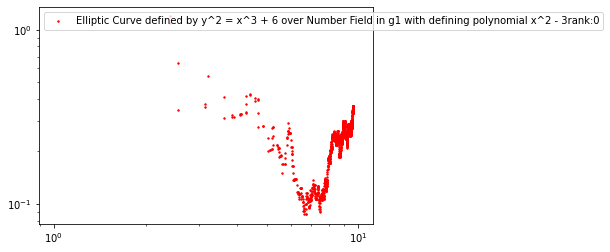

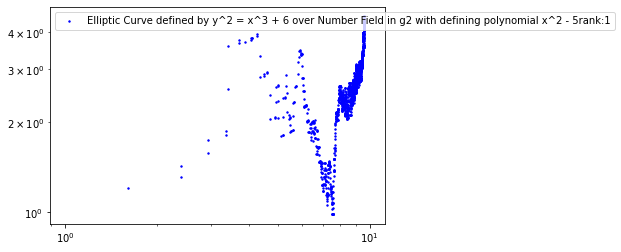

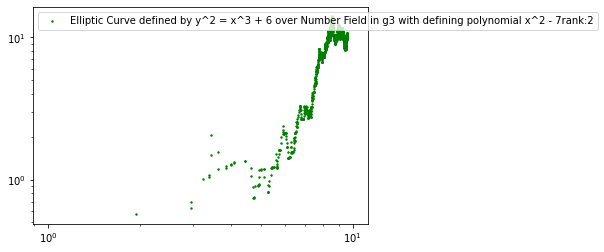

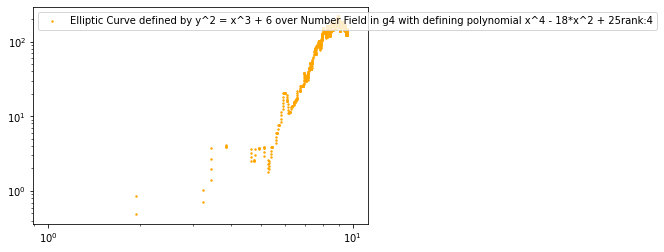

In [7]:
colour = ["red", "blue", "green", "orange", "purple"]
def plot_bsd_varyfield(E,field_list , B):
            for F in field_list:
                        EF = E.base_extend(F)
                        L = PML_list_NF(EF,F,B)
                        x = [log(entry[0]) for entry in L]
                        y = [entry[1] for entry in L]
                        plt.scatter(x,y,color = colour[field_list.index(F)%5],s=2,label = str(EF)+"rank:"+str(EF.rank()))
                        plt.legend(loc = 'upper left')
                        plt.xscale("log")
                        plt.yscale("log")            
                        plt.show()
            return
E = EllipticCurve([0,6])
polynomials = [x^2-3,x^2-5,x^2-7,25- 18*x^2 + x^4]
K1.<g1> = NumberField(x^2-3)
K2.<g2> = NumberField(x^2-5)
K3.<g3> = NumberField(x^2-7)
K4.<g4> = NumberField(25- 18*x^2 + x^4)
ListofFields=[K1,K2,K3,K4]
plot_bsd_varyfield(E,ListofFields,15000)

Exercise 6. Why is the **poor man's analytic rank** (the slope of $\log(f_E(x))$ against $\log\log(x)$) equal to the actual analytic rank (order of vanishing at $s=1$ of $L(E/\mathbb{Q},s))?

Let $L(s) := L(E,s).$ Recall that the logarithmic derivative of $L$ has at most simple poles and their residues are equal to the order of vanishing (or pole order) of $L.$ 
I.e. $$\operatorname{rank}_{an} = \lim_{s \to 1}(s-1)L'(s)/L(s).$$